# Simple Linear Regression for FEV Analysis

In [1]:
#Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris
dfd = load_iris()

In [4]:
df=pd.read_csv(r'C:\Sanrusha-Canon Laptop\Udemy\Machine Learning\SampleDataSet\fev_dat.txt', delimiter= '\s+')
df.head()

,age,FEV,ht,sex,smoke
0,9,1.708,57.0,0,0
1,8,1.724,67.5,0,0
2,7,1.720,54.5,0,0
3,9,1.558,53.0,1,0
4,9,1.895,57.0,1,0


In [5]:
df.isnull().sum()

age      0
FEV      0
ht       0
sex      0
smoke    0
dtype: int64

In [6]:
##Data Exploration

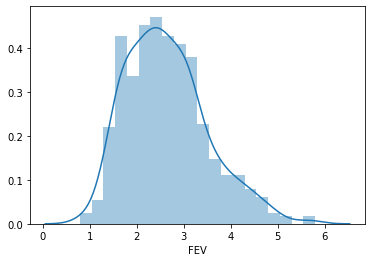

In [7]:
sns.distplot(df['FEV'])
plt.show()

In [8]:
##Correlation Matrix

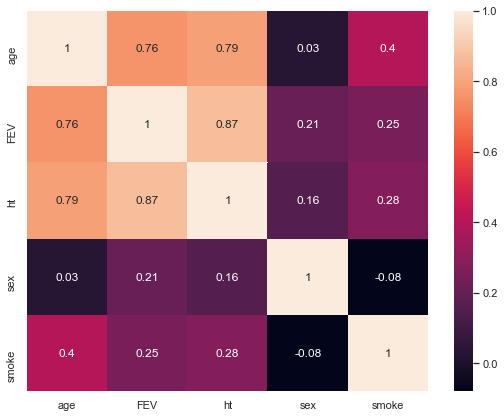

In [9]:
sns.set(rc={'figure.figsize':(9,7)})
corr_matrix=df.corr().round(2)
sns.heatmap(data=corr_matrix,annot=True)
plt.show()

In [10]:
#Find the relationship type between Target variable and feature values

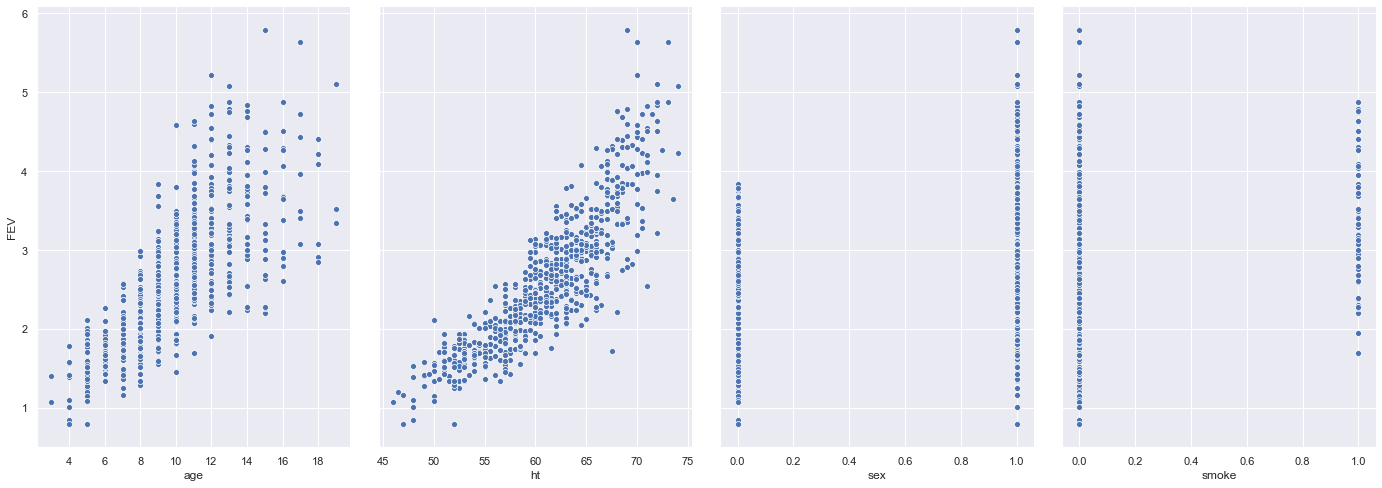

In [24]:
sns.pairplot(df, x_vars=['age','ht','sex','smoke'], y_vars='FEV', height=7, aspect=0.7)
plt.show()

In [12]:
#Define X and Y
#X=np.c_[df['age'],df['ht']]
X=df[['age']].values
y=df[['FEV']].values

In [13]:
#Split Data in Training and Testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.size,X_test.size,y_train.size,y_test.size)

523 131 523 131


In [14]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

#Train the model
linear_reg.fit(X_train,y_train)



#predict y based on test data
y_pred=linear_reg.predict(X_test)

#print coefecients
print('Coefficient b1 ', linear_reg.coef_)
print('Y Intercept ', linear_reg.intercept_)
#model score
print('Model score: '+str(linear_reg.score(X_test,y_test)))

Coefficient b1  [[0.21951201]]
Y Intercept  [0.4560736]
Model score: 0.6079354399638406


In [15]:

#Train the model
linear_reg.fit(X_train,y_train)



#predict y based on test data
y_pred=linear_reg.predict(X_test)

#print coefecients
print('Coefficient b1 ', linear_reg.coef_)
print('Y Intercept ', linear_reg.intercept_)
#model score
print('Model score: '+str(linear_reg.score(X_test,y_test)))

Coefficient b1  [[0.21951201]]
Y Intercept  [0.4560736]
Model score: 0.6079354399638406


In [16]:
#Visualization

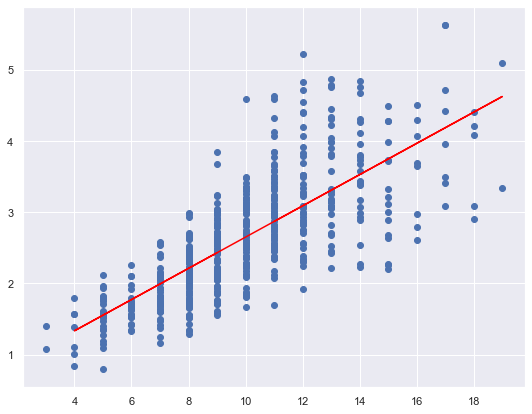

In [17]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_pred,color="red")
plt.show()

In [18]:
##Visualize 

In [19]:
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1.head(15)

,Actual,Predicted
0,2.501,2.870706
1,2.752,3.090218
2,2.258,2.212170
3,2.850,2.431682
4,2.144,2.212170
5,2.040,2.431682
6,2.140,2.870706
7,3.022,2.870706
8,3.549,3.309730
9,3.186,3.090218


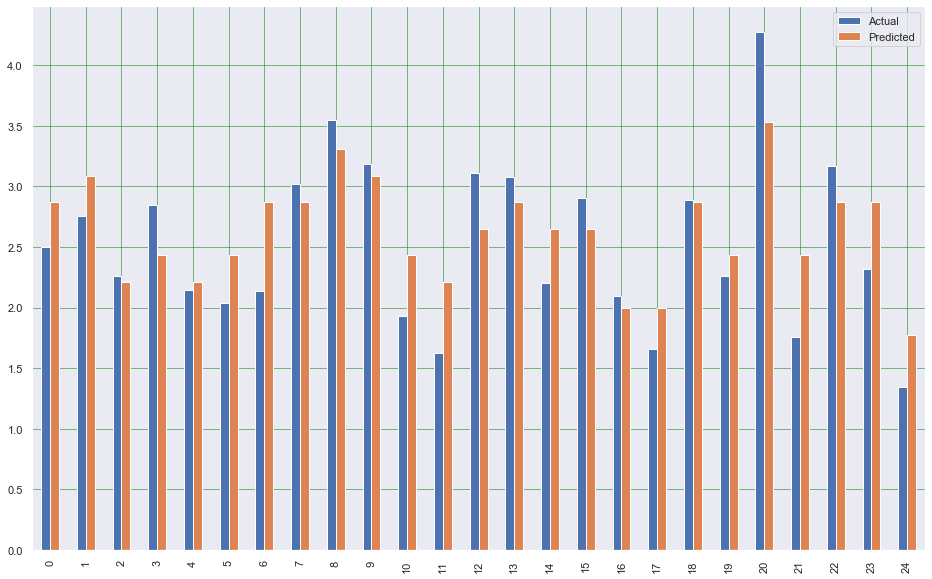

In [20]:
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [21]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score ',r2_score(y_test,y_pred))

Mean Absolute Error: 0.4077839467915311
Mean Squared Error: 0.2960026219503895
Root Mean Squared Error: 0.5440612299644126
R2 Score  0.6079354399638406
